In [2]:
# Strictly global neg FB
# - GAP is activated, is only cytosolic, active everywhere, quickly. 
# - Synchronous oscillation

# Strictly local neg FB
# - Patches are isulated from one another.
# - Cdc42-GEF complex converted to Cdc42-GEFi

# Hybrid neg FB
# - GEF phosphorylated but returns to cytosol. 
# - Sites are coupled through cytosol. 
# - Asynchronous oscillation

In [1]:
using DifferentialEquations
using ModelingToolkit
using LinearAlgebra
using Plots
using Colors
using Images
using Statistics
using Sundials
using Random

In [67]:
function run_ode(p,u0)
    min_prob = ODEProblem(rhosim,u0,(0.0,5000),p)
    sol_simp = solve(min_prob,CVODE_BDF(linear_solver = :GMRES),saveat=1)
    return sol_simp
end

run_ode (generic function with 1 method)

In [90]:
# ODEs
function rhosim(du,u,p,t)
    rhoT, rhoD, GEFm, GEFc, PAKm, PAKc = u
    a, b, c, d, e, f, g, k1, k2, k3 = p
    r1 = a*GEFm*(rhoD/(k1+rhoD)) - b*rhoT # rhoD <-> rhoT
    r2 = c*rhoT*(GEFc/(k2+GEFc)) - d*GEFm - g*GEFm*(PAKm^10/(k4^10 + PAKm^10)) # GEFc <-> GEFm
    r3 = e*rhoT*(PAKc/(k3+PAKc)) - f*PAKm*(k5/(k5+rhoT)) # PAKc <-> PAKm
    du[1] = r1 
    du[2] = -r1 
    du[3] = r2  #rhoGEF
    du[4] = -r2 #GEFc
    du[5] = r3
    du[6] = -r3
end

a = .1
b = .01
c = .1
d = .01
e = .01
f = .01
g = 10
k1 = 10
k2 = 10
k3 = 10
k4 = 10
k5 = 1
p = [a,b,c,d,e,f,g,k1,k2,k3]
u0 = [1,100,1,10,1,100]

6-element Vector{Int64}:
   1
 100
   1
  10
   1
 100

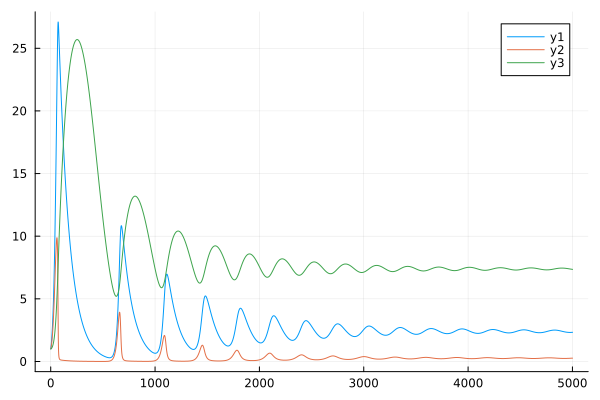

In [91]:
odesol = run_ode(p, u0)
plot(odesol[1,:])
plot!(odesol[3,:])
plot!(odesol[5,:])

In [56]:
# ODEs
function rhosim(du,u,p,t)
    rhoT, rhoD, rhoGEF, GEFc, PAK, PAKc, rhoGEFi = u
    a, b, c, d, e, f, g = p
    r1 = (a*rhoGEF*rhoD) - b*rhoT 
    r2 = c*rhoT*GEFc - d*rhoGEF  # +1 rhoGEF, -1 rhoT, -1 GEFc
    r3 = f*PAKc*(rhoT+rhoGEF+rhoGEFi) - g*(PAK)
    du[1] = r1 - r2
    du[2] = -r1 + h*rhoGEFi
    du[3] = r2 - e*rhoGEF*PAK #rhoGEF
    du[4] = -r2 + h*rhoGEFi #GEFc
    du[5] = r3 #PAK
    du[6] = -r3 #PAKc
    du[7] = e*rhoGEF*PAK - h*rhoGEFi #RhoGEFi
end

a = .01
b = .01
c = .001
d = .01
e = 0.06
f = .0001
g = .007
h = .02
p = [a,b,c,d,e,f,g,h]
u0 = [1,100,1,100,1,100,0]

7-element Vector{Int64}:
   1
 100
   1
 100
   1
 100
   0

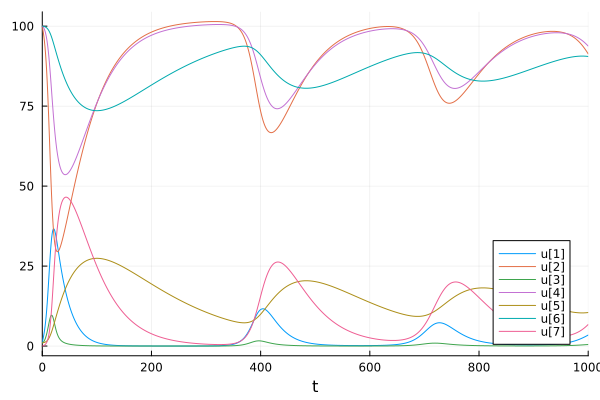

In [146]:
odesol = run_ode(p, u0)
plot(odesol, legend=:bottomright)

In [192]:
# ODEs
function rhosim(du,u,p,t)
    rhoT, rhoD, rhoGEF, GEFc, PAK, PAKc, rhoGEFi = u
    a, b, c, d, e, f, g = p
    r1 = (a*rhoGEF*rhoD) - b*rhoT 
    r2 = c*rhoT*GEFc - d*rhoGEF  # +1 rhoGEF, -1 rhoT, -1 GEFc
    r3 = f*PAKc*(rhoT+rhoGEF+rhoGEFi) - g*(PAK)
    du[1] = r1 - r2
    du[2] = -r1 + h*rhoGEFi
    du[3] = r2 - e*rhoGEF*PAK #rhoGEF
    du[4] = -r2 + h*rhoGEFi #GEFc
    du[5] = r3 #PAK
    du[6] = -r3 #PAKc
    du[7] = e*rhoGEF*PAK - h*rhoGEFi #RhoGEFi
end

a = .04
b = .04
c = .004
d = .04
e = 0.24
f = .0004
g = .028
h = .06
p = [a,b,c,d,e,f,g,h]
u0 = [1,100,1,100,1,100,0]

7-element Vector{Int64}:
   1
 100
   1
 100
   1
 100
   0

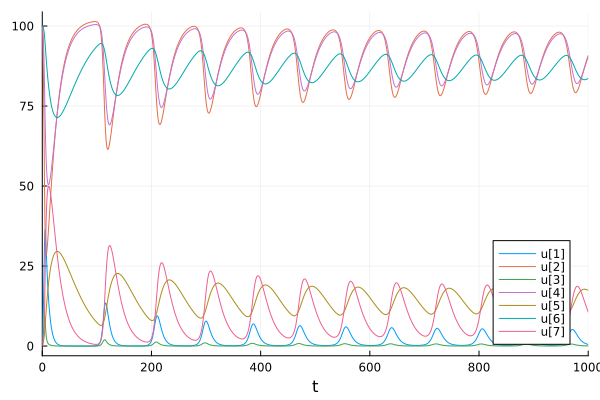

In [195]:
odesol = run_ode(p, u0)
plot(odesol, legend=:bottomright)

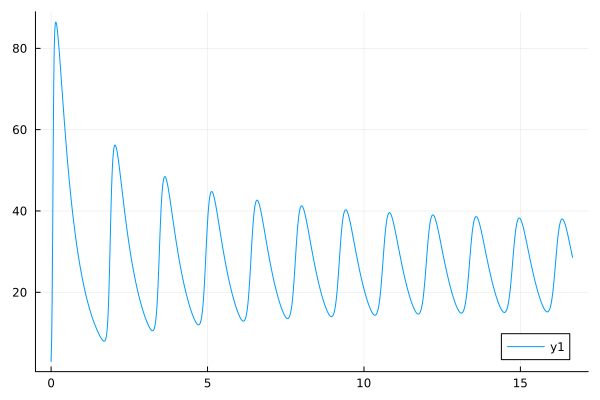

attempt to save state beyond implementation limit


In [205]:
odesol = run_ode(p, u0)
plot([0:1000]./60, odesol[1,:]+odesol[3,:]+odesol[5,:]+odesol[7,:], legend=:bottomright)

In [188]:
# ODEs
function rhosim(du,u,p,t)
    rhoT, rhoD, rhoGEF, GEFc, PAK, PAKc, rhoGEFi = u
    a, b, c, d, e, f, g = p
    r1 = (a*rhoGEF*rhoD) - b*rhoT 
    r2 = c*rhoT*GEFc - d*rhoGEF  # +1 rhoGEF, -1 rhoT, -1 GEFc
    r3 = f*PAKc*(rhoT+rhoGEF+rhoGEFi) - g*(PAK)
    du[1] = r1 - r2
    du[2] = -r1 + h*rhoGEFi
    du[3] = r2 - e*rhoGEF*PAK #rhoGEF
    du[4] = -r2 + h*rhoGEFi #GEFc
    du[5] = r3 #PAK
    du[6] = -r3 #PAKc
    du[7] = e*rhoGEF*PAK - h*rhoGEFi #RhoGEFi
end

a = .04
b = .04
c = .004
d = .04
e = 0.24
f = .0004
g = .028
h = .06
p = [a,b,c,d,e,f,g,h]
u0 = [1,100,1,100,0,0,0]

7-element Vector{Int64}:
   1
 100
   1
 100
   0
   0
   0

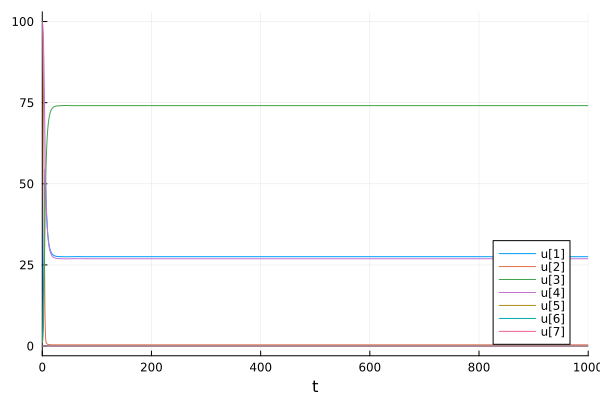

In [189]:
odesol = run_ode(p, u0)
plot(odesol, legend=:bottomright)

In [348]:
function setup(r)
    # Generate constants
    N = 100
    SA = 4*pi*r^2
    V = (4/3)*pi*r^3
    mem_thickness = 0.01
    n = (mem_thickness * SA) / V

    Ax = Array(Tridiagonal([1.0 for i in 1:N-1],[-2.0 for i in 1:N],[1.0 for i in 1:N-1]))
    Ax[1,end] = 1.0
    Ax[end,1] = 1.0
    dx = (r*sqrt(pi))/N
    Ax = Ax/(dx^2) # adjust for 1/microns
    Ay = copy(Ax)

    r0 = zeros(100,100,7)
    Random.seed!(1)
    r0[:,:,1] .= 10 .*(rand.())   # Cdc42-GTPm
    r0[:,:,2] .= 0.5 - mean(r0[:,:,1])*n   # Cdc42-GDPm
    r0[:,:,3] .= 10 .*(rand.())
    r0[:,:,4] .= 1*n
    r0[:,:,5] .= 0
    r0[:,:,6] .= 0 #1*n
    r0[:,:,7] .= 0
    
    # Dummy parameters used only locally in fxn but passed to specify scope, or something..
    Ayt = zeros(N,N)
    tAx = zeros(N,N)
    D42t = zeros(N,N)
    D42d = zeros(N,N)
    D42g = zeros(N,N)
    Dgefc = zeros(N,N)
    Dpak = zeros(N,N)
    Dpakc = zeros(N,N)
    D42gi = zeros(N,N)
    r1 = zeros(N,N)
    r2 = zeros(N,N)
    r3 = zeros(N,N)
    dummy = (Ayt, tAx, D42t, D42d, Dpak, D42g, Dgefc, Dpak, Dpakc, D42gi, r1, r2, r3)
    # Actual parameters

    a = 10
    b = .1
    c = 1
    d = .04
    e = 0.24
    f = .0004
    g = .028
    h = .06
    
    Dm = 0.0025
    Dc = 10
    Dm2 = 0.1
    n = n

    p = (a, b, c, d, e, f, g, h, Dm, Dc, Dm2, n, Ax, Ay, dummy)
    return p, r0
end

setup (generic function with 1 method)

In [349]:
function simple!(dr,r,p,t)
    a, b, c, d, e, f, g, h, Dm, Dc, Dm2, n, Ax, Ay, dummy = p
    Ayt, tAx, D42t, D42d, Dpak, D42g, Dgefc, Dpak, Dpakc, D42gi, r1, r2, r3 = dummy
    # Window variables
    rhoT = @view r[:,:,1]
    rhoD = @view r[:,:,2]
    rhoGEF = @view r[:,:,3]
    GEFc = @view r[:,:,4]
    PAK = @view r[:,:,5]
    PAKc = @view r[:,:,6]
    rhoGEFi = @view r[:,:,7]
    
    # Calculate diffusion
    mul!(Ayt,Ay,rhoT)
    mul!(tAx,rhoT,Ax)
    @. D42t = Dm*(Ayt + tAx)
    mul!(Ayt,Ay,rhoD)
    mul!(tAx,rhoD,Ax)
    @. D42d = Dc*(Ayt + tAx)
    mul!(Ayt,Ay,rhoGEF)
    mul!(tAx,rhoGEF,Ax)
    @. D42g = Dm*(Ayt + tAx)
    mul!(Ayt,Ay,GEFc)
    mul!(tAx,GEFc,Ax)
    @. Dgefc = Dc*(Ayt + tAx)
    mul!(Ayt,Ay,PAK)
    mul!(tAx,PAK,Ax)
    @. Dpak = Dm2*(Ayt + tAx)
    mul!(Ayt,Ay,PAKc)
    mul!(tAx,PAKc,Ax)
    @. Dpakc = Dc*(Ayt + tAx)
    mul!(Ayt,Ay,rhoGEFi)
    mul!(tAx,rhoGEFi,Ax)
    @. D42gi = Dm*(Ayt + tAx)
    # Calculate reactions, add diffusion
    r1 = (a*rhoGEF*rhoD) - b*rhoT 
    r2 = c*rhoT*GEFc - d*rhoGEF  # +1 rhoGEF, -1 rhoT, -1 GEFc
    r3 = f*PAKc*(rhoT+rhoGEF+rhoGEFi) - g*(PAK)
    @. dr[:,:,1] = r1 - r2 + D42t
    @. dr[:,:,2] = n*(h*rhoGEFi - r1) + D42d
    @. dr[:,:,3] = r2 - e*rhoGEF*PAK + D42g
    @. dr[:,:,4] = n*(h*rhoGEFi - r2) + Dgefc 
    @. dr[:,:,5] = r3 + Dpak
    @. dr[:,:,6] = n*(-r3) + Dpakc
    @. dr[:,:,7] = e*rhoGEF*PAK - h*rhoGEFi + D42gi
end


simple! (generic function with 1 method)

In [350]:
function run(radius)
    p, r0 = setup(radius)
    min_prob = ODEProblem(simple!,r0,(0.0,100),p)
    sol_simp = solve(min_prob,CVODE_BDF(linear_solver = :GMRES),saveat=1)
    return sol_simp
end

run (generic function with 1 method)

In [124]:
# Generate the constants
N = 100
r = 10 #um
SA = 4*pi*r 
V = (4/3)*pi*r^2
mem_thickness = 0.01
n = (mem_thickness * SA) / V

Ax = Array(Tridiagonal([1.0 for i in 1:N-1],[-2.0 for i in 1:N],[1.0 for i in 1:N-1]))
Ax[1,end] = 1.0
Ax[end,1] = 1.0
dx = (r*sqrt(pi))/N
Ax = Ax/(dx^2) # adjust for 1/microns
Ay = copy(Ax)

r0 = zeros(100,100,9)
r0[:,:,1] .= 32*2 .*(rand.())   # Cdc42-GTPm
r0[:,:,2] .= 22.2*2 .*(rand.())   # Cdc42-GDPm
r0[:,:,3] .= .4              # Cdc42-GDPc
# total GTPase = 1uM
r0[:,:,4] .= 0.017             # BemGEFc
r0[:,:,5] .= 0.0431                # BemGEFm
r0[:,:,6] .= 1.4                # BemGEF42
# total BemGEF = 0.017uM
r0[:,:,7] .= 0              # Pak1m
r0[:,:,8] .= 0.5               # Pak1c
r0[:,:,9] .= 0                  # Pak1p
# total PAK1 = 0.5uM

# Dummy parameters used only locally in fxn but passed to specify scope, or something..
Ayt = zeros(N,N)
Ayd = zeros(N,N)
tAx = zeros(N,N)
dAx = zeros(N,N)
D42t = zeros(N,N)
D42d = zeros(N,N)
DBG = zeros(N,N)
DBG42 = zeros(N,N)
Dpak = zeros(N,N)
Dpakp = zeros(N,N)
dummies = (Ayt, Ayd, tAx, dAx, D42t, D42d, DBG, DBG42, Dpak, Dpakp)

([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0])

In [ ]:
function mechanistic!(dr,r,p,t)
    k1a, k1b, k2a, k2b, k3, k4a, k4b, k5a, k7, k8a, k8b, k9, k10, Dm, Dm2, n, Ax, Ay, tAx, Ayt, dummies = p
    Ayt, Ayd, tAx, dAx, D42t, D42d, DBG, DBG42, Dpak, Dpakp = dummies
    # Window variables
    rhoT = @view r[:,:,1]
    rhoDm = @view r[:,:,2]
    rhoDc = @view r[:,:,3]
    BGc = @view r[:,:,4]
    BGm = @view r[:,:,5]
    BG42 = @view r[:,:,6]
    Pak1m = @view r[:,:,7]
    Pak1c = @view r[:,:,8]
    Pak1p = @view r[:,:,8]
    # Calculate diffusion
    mul!(Ayt,Ay,rhoT)
    mul!(tAx,rhoT,Ax)
    @. D42t = Dm*(Ayt + tAx)
    mul!(Ayt,Ay,rhoDm)
    mul!(tAx,rhoDm,Ax)
    @. D42d = Dm*(Ayt + tAx)
    mul!(Ayt,Ay,BGm)
    mul!(tAx,BGm,Ax)
    @. DBG = Dm*(Ayt + tAx)
    mul!(Ayt,Ay,BG42)
    mul!(tAx,BG42,Ax)
    @. DBG42 = Dm*(Ayt + tAx)
    mul!(Ayt,Ay,Pak1m)
    mul!(tAx,Pak1m,Ax)
    @. Dpak = Dm2*(Ayt + tAx)
    mul!(Ayt,Ay,Pak1p)
    mul!(tAx,Pak1p,Ax)
    @. Dpakp = Dm2*(Ayt + tAx)
    # Calculate reactions, add diffusion
    @. dr[:,:,1] = (k2a*BGm + k3*BG42) * rhoDm - (k2b + k4a*BGm + k7*BGc) * rhoT + k4b*BG42 + k10*Pak1p*(BG42^10/(10^10 + BG42^10)) + D42t # rhoT
    @. dr[:,:,2] = k2b*rhoT - (k2a*BGm + k3*BG42)*rhoDm - k5b*rhoDm + k5a*rhoDc + D42d # rhoDm
    dr[:,:,3] .= (k5b*mean(rhoDm) - k5a*mean(rhoDc)) * n # rhoDc
    dr[:,:,4] .= (k1b*mean(BGm) - mean(BGc)*(k1a + k7*mean(rhoT)) + mean(k10*Pak1p*(BG42^10/(500^10 + BG42^10)))) * n #BGc
    @. dr[:,:,5] = k1a*BGc - k1b*BGm + k4b*BG42 - k4a*BGm*rhoT + DBG # BGm
    @. dr[:,:,6] = (k4a*BGm + k7*BGc) * rhoT - k4b*BG42 - k10*Pak1p*(BG42^10/(10^10 + BG42^10)) + DBG42 # BG42
    @. dr[:,:,7] = k8a*Pak1c*(rhoT+BG42) - k8b*(Pak1m) - k9*Pak1m*Pak1m*rhoT + Dpak # Pak1m
    dr[:,:,8] .= (k8b*(mean(Pak1m)) - k8a*mean(Pak1c)*(mean(rhoT)+mean(BG42)) + k8b*mean(Pak1p)) * n # Pak1c
    @. dr[:,:,9] = k9*Pak1m*Pak1m*rhoT - k8b*(Pak1p) + Dpakp
    
  end

mechanistic! (generic function with 1 method)

In [219]:
k1a = 10
k1b = 10
k2a = 0.16 # 0.16
k2b = 3 # 1.75 #was changed in code for Chio 2020
k3 = 1 # 0.35
k4a = 10
k4b = 10
k5a = 36
k5b = 0.65
k7 = 10
k8a = 0.01
k8b = 0.1
k9 = 0.001
k10 = 0.00
Dm = 0.0025
Dm2 = 0.01
n = n
p = (k1a, k1b, k2a, k2b, k3, k4a, k4b, k5a, k7, k8a, k8b, k9, k10, Dm, Dm2, n, Ax, Ay, tAx, Ayt, dummies)

(10, 10, 0.16, 3, 1, 10, 10, 36, 10, 0.01, 0.1, 0.001, 0.0, 0.0025, 0.01, 0.003, [-63.66197723675816 31.83098861837908 … 0.0 31.83098861837908; 31.83098861837908 -63.66197723675816 … 0.0 0.0; … ; 0.0 0.0 … -63.66197723675816 31.83098861837908; 31.83098861837908 0.0 … 31.83098861837908 -63.66197723675816], [-63.66197723675816 31.83098861837908 … 0.0 31.83098861837908; 31.83098861837908 -63.66197723675816 … 0.0 0.0; … ; 0.0 0.0 … -63.66197723675816 31.83098861837908; 31.83098861837908 0.0 … 31.83098861837908 -63.66197723675816], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], ([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0

In [220]:
k1a = 10
k1b = 10
k2a = 0.16 # 0.16
k2b = 3 # 1.75 #was changed in code for Chio 2020
k3 = 1 # 0.35
k4a = 10
k4b = 10
k5a = 36
k5b = 0.65
k7 = 10
k8a = 0.01
k8b = 0.1
k9 = 0.001
k10 = 0.0001
Dm = 0.0025
Dm2 = 0.01
n = n
p = (k1a, k1b, k2a, k2b, k3, k4a, k4b, k5a, k7, k8a, k8b, k9, k10, Dm, Dm2, n, Ax, Ay, tAx, Ayt, dummies)

(10, 10, 0.16, 3, 1, 10, 10, 36, 10, 0.01, 0.1, 0.001, 0.0001, 0.0025, 0.01, 0.003, [-63.66197723675816 31.83098861837908 … 0.0 31.83098861837908; 31.83098861837908 -63.66197723675816 … 0.0 0.0; … ; 0.0 0.0 … -63.66197723675816 31.83098861837908; 31.83098861837908 0.0 … 31.83098861837908 -63.66197723675816], [-63.66197723675816 31.83098861837908 … 0.0 31.83098861837908; 31.83098861837908 -63.66197723675816 … 0.0 0.0; … ; 0.0 0.0 … -63.66197723675816 31.83098861837908; 31.83098861837908 0.0 … 31.83098861837908 -63.66197723675816], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], ([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 

In [ ]:
mech_prob = ODEProblem(mechanistic!,r0,(0.0,600),p)
sol_mp = solve(mech_prob,CVODE_BDF(linear_solver = :GMRES),saveat=10)

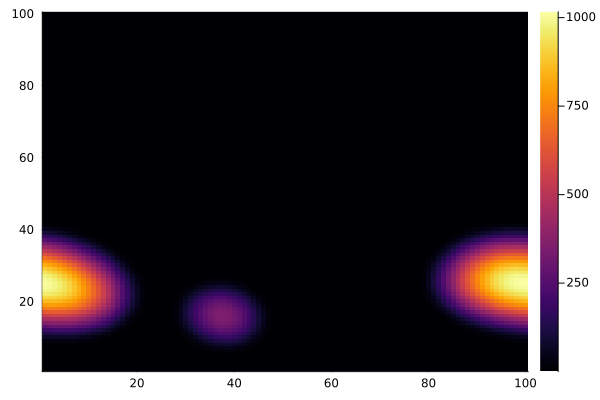

In [216]:
Plots.heatmap(sol_mp[:,:,6,60])

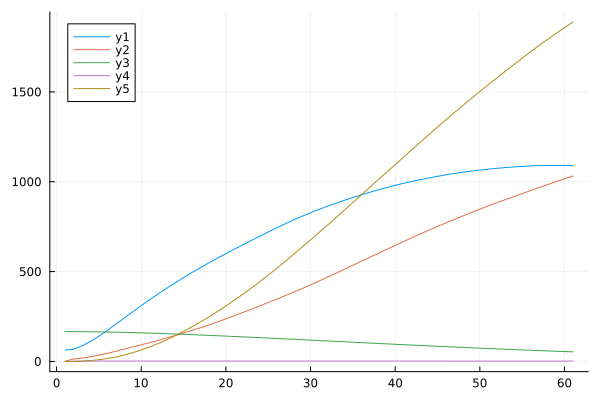

In [217]:
T = dropdims(maximum(sol_mp[:,:,1,:], dims=(1,2)), dims = (1,2))
D = dropdims(maximum(sol_mp[:,:,2,:], dims=(1,2)), dims = (1,2))
Dc = dropdims(maximum(sol_mp[:,:,3,:], dims=(1,2)), dims = (1,2)) ./ n
BG = dropdims(maximum(sol_mp[:,:,4,:], dims=(1,2)), dims = (1,2))
BGm = dropdims(maximum(sol_mp[:,:,5,:], dims=(1,2)), dims = (1,2))
BG42 = dropdims(maximum(sol_mp[:,:,6,:], dims=(1,2)), dims = (1,2))
Pak = dropdims(maximum(sol_mp[:,:,7,:], dims=(1,2)), dims = (1,2))
Pakc = dropdims(maximum(sol_mp[:,:,8,:], dims=(1,2)), dims = (1,2))./n
Pakp = dropdims(maximum(sol_mp[:,:,9,:], dims=(1,2)), dims = (1,2))

plot(T)
# plot!(D)
# plot!(Dc)
# plot!(BGm)
plot!(BG42)
plot!(Pakc)
plot!(Pak)
plot!(Pakp)

┌ Info: Saved animation to /tmp/jl_jIDO1QVSV8.gif
└ @ Plots /home/dinosaur/.julia/packages/Plots/HyyIK/src/animation.jl:156


Plots.AnimatedGif("/tmp/jl_jIDO1QVSV8.gif")
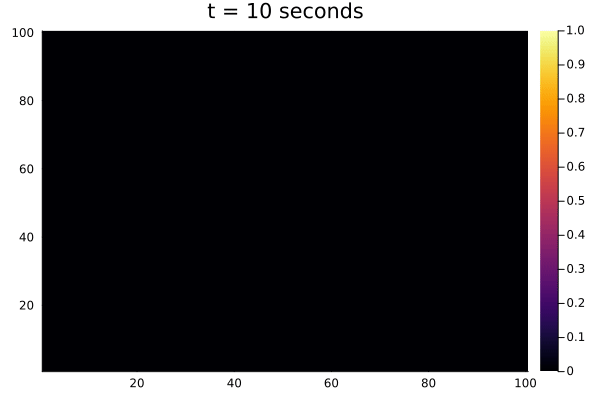

In [ ]:
anim = @animate for i in 1:60
    Plots.heatmap(sol_mp[:,:,9,i], clim(0, maximum(sol_mp[:,:,9,i])) title="t = $(i*10) seconds")
end
gif(anim, fps=5)

In [34]:
# ODEs
function rhosim(du,u,p,t)
    rhoT = @view u[1]
    rhoDm = @view u[2]
    rhoDc = @view u[3]
    BGc = @view u[4]
    BGm = @view u[5]
    BG42 = @view u[6]
    rhoT, rhoDm, rhoDc, BGc, BGm, BG42 = u
    K1a, k1b, k2a, k2b, k3, k4a, k4b, k5a, k7, n= p
    
    du[1] = (k2a*BGm + k3*BG42) * rhoDm - (k2b + k4a*BGm + k7*BGc) * rhoT + k4b*BG42 
    du[2] = k2b*rhoT - (k2a*BGm + k3*BG42)*rhoDm - k5b*rhoDm + k5a*rhoDc 
    
    du[3] = (k5b*mean(rhoDm) - k5a*mean(rhoDc)) 
    du[4] = (k1b*mean(BGm) - mean(BGc)*(k1a + k7*mean(rhoT))) 
    
    du[5] = k1a*BGc - k1b*BGm + k4b*BG42 - k4a*BGm*rhoT 
    du[6] = (k4a*BGm + k7*BGc) * rhoT - k4b*BG42 
    print(du)
end

k1a = 10
k1b = 10
k2a = 0.16
k2b = 1.75 #was changed in code for Chio 2020
k3 = 0.35 
k4a = 10
k4b = 10
k5a = 36
k5b = 0.65
k7 = 10
n = 0.1
p = (k1a, k1b, k2a, k2b, k3, k4a, k4b, k5a, k7, n)
u0 = [32,222,.4,0.017,0.431,1.4]

6-element Vector{Float64}:
  32.0
 222.0
   0.4
   0.017
   0.431
   1.4

[-61.270880000000005, -197.98911999999999, 129.9, -1.3000000000000007, -128.06, 129.35999999999999][-61.268032250773174, -197.98916078339414, 129.89971764311122, -1.300049429657225, -128.05742596139885, 129.35747539105608][-51.332806077127856, -198.1312901220452, 128.91427997000028, -1.4725945672368894, -119.07722166193591, 120.54981622917279][-56.300277384280186, -198.0602664206151, 129.40707252289786, -1.3863007159469243, -123.56717056605049, 124.95347128199742][-56.642258145654836, -198.02460792425873, 129.41070333724267, -1.3714147623591026, -123.88474797031179, 125.2561627326709][-56.46415942494046, -198.04317812201427, 129.40881248514512, -1.3791671003936674, -123.71935796141594, 125.09852506180961][-51.65902716429817, -198.09713621048982, 128.91762497029023, -1.4583506455429287, -119.38018775895483, 120.83853840449774][-51.99854818734156, -198.06188872194747, 128.92145401229715, -1.444172271207548, -119.69481062578431, 121.13898289699183][-51.81896746752811, -198.0805317189628, 

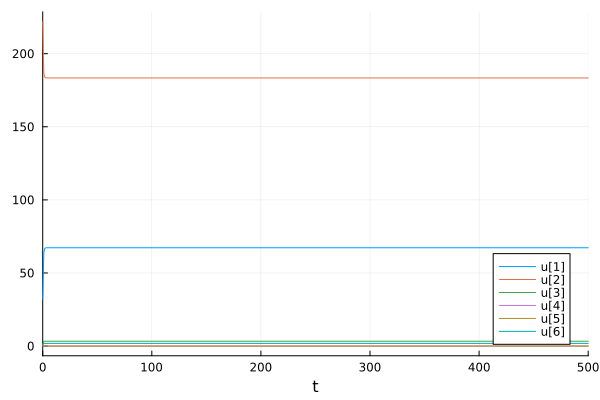

In [35]:
odesol = run_ode(p, u0)
plot(odesol, legend=:bottomright)